![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 3: Logistic Regression & Classification

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 125

<hr style="height:2.4pt">

In [85]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
# from prettytable import PrettyTable
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### /names here/

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with gene data from a cancer study in **Part A** and another with the COMPAS data in **Part B**.


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part A: Cancer Classification from Gene Expressions [45 points total] </h2>    <br />

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The dataset is provided in the file `data/cancer_genes.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The column `Cancer_type` gives the types of cancer, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use logistic regression to build classification models for this data set. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the dataset [5 points]** 

To reach the goal of classification of the classes of cancer, start by inspecting the dataset.

**1.1** [1pt] Load the dataset and split the data into an approximate 80-20 train-test sets. <br /><br />
**1.2** [2pts] Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1. 
<br />**NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.** <br/><br />
**1.3** [2pts] The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences. <br /><br />


## Solutions 

### 1.1
**Load the dataset and split the data into an approximate 80-20 train-test sets.**

In [110]:
# load the dataset
gene_data = pd.read_csv('data/cancer_genes.csv')

# Select predictor and response variables
X = gene_data.iloc[:, 2:]
y = gene_data.iloc[:, 1]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns, index=X.index)

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(601, 7129) (151, 7129) (601,) (151,)


In [169]:
gene_data.head()

,Unnamed: 0,Cancer_type,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0,0.0,-214.0,-153.0,-58.0,88.0,-295.0,-558.0,199.0,-176.0,...,185.0,511.0,-125.0,389.0,-37.0,793.0,329.0,36.0,191.0,-37.0
1,1,0.0,-135.0,-114.0,265.0,12.0,-419.0,-585.0,158.0,-253.0,...,240.0,835.0,218.0,174.0,-110.0,627.0,170.0,-50.0,126.0,-91.0
2,2,0.0,-106.0,-125.0,-76.0,168.0,-230.0,-284.0,4.0,-122.0,...,156.0,649.0,57.0,504.0,-26.0,250.0,314.0,14.0,56.0,-25.0
3,3,0.0,-72.0,-144.0,238.0,55.0,-399.0,-551.0,131.0,-179.0,...,30.0,819.0,-178.0,151.0,-18.0,1140.0,482.0,10.0,369.0,-42.0
4,4,0.0,-413.0,-260.0,7.0,-2.0,-541.0,-790.0,-275.0,-463.0,...,289.0,629.0,-86.0,302.0,23.0,1798.0,446.0,59.0,781.0,20.0


In [170]:
gene_data.shape

(752, 7131)

### 1.2

**Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.**
<br />NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.

In [113]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)
print(type(X_train_norm))
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index)
X_train_norm_df.head(3)

<class 'numpy.ndarray'>


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
585,0.449248,0.511972,0.691606,0.556606,0.364965,0.354236,0.704394,0.286927,0.686325,0.386291,...,0.482527,0.411166,0.501314,0.435314,0.624691,0.469081,0.431141,0.693760,0.591315,0.574723
131,0.621339,0.334273,0.589230,0.439587,0.524953,0.491959,0.790105,0.568881,0.676857,0.561299,...,0.699944,0.595743,0.374207,0.427203,0.503224,0.700563,0.399552,0.419959,0.458827,0.503399
44,0.452590,0.571979,0.175384,0.299435,0.390593,0.156838,0.834868,0.416063,0.586133,0.414187,...,0.522651,0.697904,0.348884,0.481884,0.598199,0.760218,0.588167,0.630986,0.467961,0.375811


In [114]:
X_train_norm_df.shape, X_train.shape

((601, 7129), (601, 7129))

### 1.3

**The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.**

**Ans: When there are more predictors than the number of observations, then the classification model will overfit**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 2: Determining the best predictors [15 points]** 
<br /><br />
 
**2.1** [10pts] The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset). 
 
**Hint:** You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .
 
<br /><br />
**2.2** [5pts] Call the predictor that discriminates the best above `best_predictor` and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different `Cancer_type` classes.


## Solutions 

### 2.1
**The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset).**

**Hint: You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .**

In [115]:
# function to calculate ttest value and return n best predictors
t_dict = {}
def ttest(Xtrain, ytrain, n):
    """
    Xtrain: training predictors df
    ytrain: training labels
    n = no of best prepdictors to be returned
    """
    cols = Xtrain.columns
    for col in cols:
        xpos = Xtrain[ytrain==1][col]
        xneg = Xtrain[ytrain==0][col]
        xpos_mean = xpos.mean()
        xneg_mean = xneg.mean()
        mean_diff = np.abs(xpos_mean - xneg_mean)
        npos = len(xpos)
        nneg = len(xneg)
        var_pos = np.var(xpos, ddof=1)
        var_neg = np.var(xneg, ddof=1)
        denominator = np.sqrt((var_pos/npos) + var_neg/nneg)
        test_value = mean_diff/denominator
        t_dict[col] = test_value
    sorted_preds = sorted(t_dict.items(), key=lambda x: x[1], reverse=True)
    best_predictors = [p[0] for p in sorted_preds]
    
    return best_predictors[:n]

In [97]:
# 10 genes that individually discriminate between the two cancer classes the best
# ten_best_genes = ttest(X_train_norm_df, y_train, 10)
# ten_best_genes

['X95735_at',
 'Y08612_at',
 'M31523_at',
 'X61587_at',
 'U50136_rna1_at',
 'X17042_at',
 'M84526_at',
 'X76648_at',
 'J04615_at',
 'X59350_at']

### 2.2
**Call the predictor that discriminates the best above best_predictor and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different Cancer_type classes.**

In [119]:
X.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U48730_at', 'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at',
       'X83863_at', 'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at'],
      dtype='object', length=7129)

In [116]:
best_predictor = ten_best_genes[0]
print("The best predictor column is:",best_predictor)

The best predictor column is: X95735_at


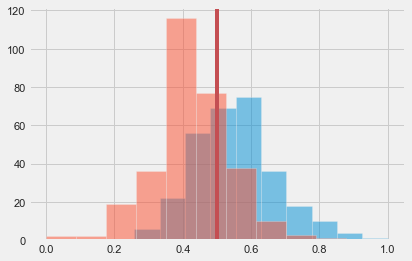

In [117]:
# plot histogram of best predictor column in train set
plt.style.use('fivethirtyeight')
plt.hist(X_train_norm_df[best_predictor][y_train==1], alpha=0.5)
plt.hist(X_train_norm_df[best_predictor][y_train==0], alpha=0.5)
plt.axvline(0.5, color='r')
plt.show()

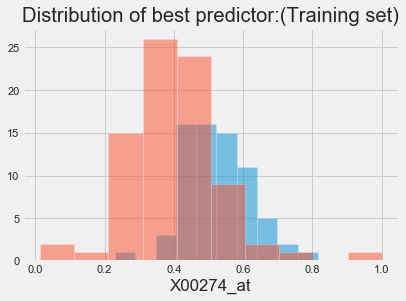

In [118]:
# plot histogram of best predictor column in train set
plt.style.use('fivethirtyeight')
plt.hist(X_test[best_predictor][y_test==1], alpha=0.5)
plt.hist(X_test[best_predictor][y_test==0], alpha=0.5)
plt.xlabel("X95735_at")
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 3: Predicting the types of cancer based on gene expression [25 points]**
<br /><br />

**3.1** [10pts] Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` identified in the previous part to predict cancer type. <br/>
**Note:** Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').
<br /><br />

**3.2** [5pts] Print and interpret Logistic Regression coefficient and intercept. 
<br /><br />
**3.3** [10pts] Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$. 

## Solutions

### 3.1
**Fit a simple logistic regression model to the training set using the single gene predictor best_predictor identified in the previous part to predict cancer type.**<br />
Note: Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').

In [122]:
# set the predictor
x_train = X_train[[best_predictor]]

# instantiate logistic regression model
log_clf = LogisticRegression(C=100000)
# fit the logistic regression model
log_clf.fit(x_train, y_train)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.2
**Print and interpret Logistic Regression coefficient and intercept.**

In [123]:
coef = log_clf.coef_
intercept = log_clf.intercept_
print("Coefficient:", coef)
print("Intercept:", intercept)

Coefficient: [[10.08762369]]
Intercept: [-4.68574901]


In [126]:
def sigmoid(x):
    return 1/(1+np.exp(-(intercept + coef*x)))

x = np.linspace(0, 1, 1000)
y = sigmoid(x)

In [128]:
x.shape, y.shape

((1000,), (1, 1000))

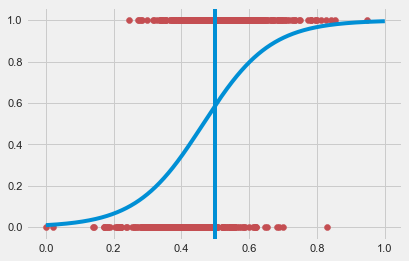

In [132]:
y_ = y.reshape(-1, 1)
plt.scatter(x_train, y_train, color='r')
plt.plot(x, y_)
plt.axvline(0.5)

**Your answer here**

### 3.3
<b>
Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor.<br />
- the true binary response.<br />
- a horizontal line at y=0.5.
</b>

In [133]:
train_preds = log_clf.predict_proba(x_train)
train_preds

array([[0.05384005, 0.94615995],
       [0.37528589, 0.62471411],
       [0.75054623, 0.24945377],
       ...,
       [0.30106536, 0.69893464],
       [0.7755778 , 0.2244222 ],
       [0.58636802, 0.41363198]])

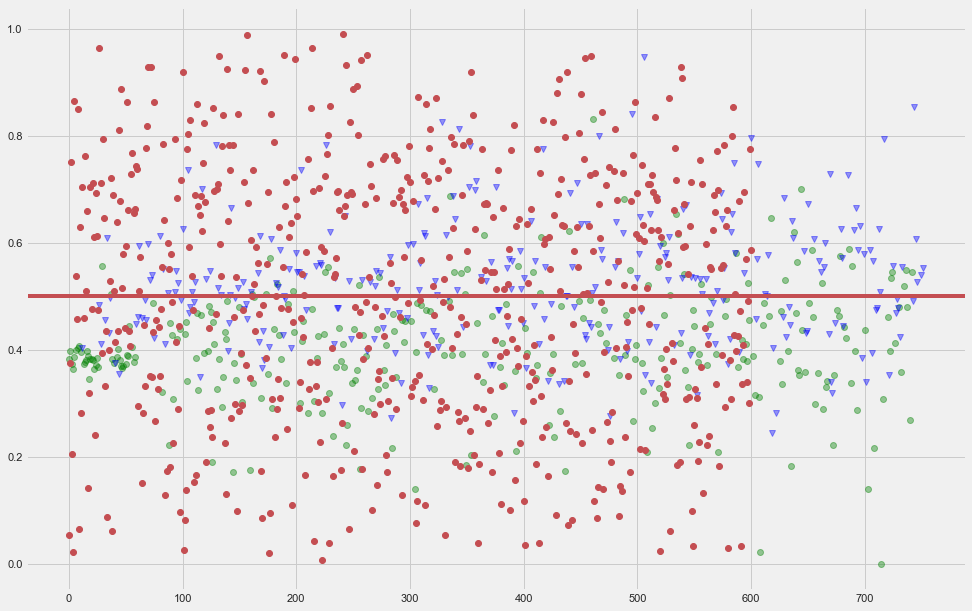

In [143]:
plt.figure(figsize=(15, 10))
plt.plot(x_train[y_train == 0], 'bo', color='green', alpha=0.4)
plt.plot(x_train[y_train == 1], 'v', color='blue', alpha=0.4)
# plt.plot(train_preds[:, 0], 'bo', color='r')
plt.axhline(0.5, color='r')
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part B: Racial bias in machine learning systems [60 points total] </h2>    <br />


![](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-2400*1350-00796e.jpg)

<br /><br />
<b> Dataset Description </b><br /><br />
The main dataset is the *compas.csv*.
The variables are roughly explained in the `compas_datadict.csv` file, and ProPublica's analysis is publically available here: https://github.com/propublica/compas-analysis.

The dataset was made publically available by **Northpointe**, an American tech-company that works with law establishment across several states in the US to predict future crimes based on past records of criminals.

It has been suspected that the software used by Northpointe, `COMPAS`, is biased against the african american criminals, who end up with `high-risk` tags, despite minor criminal record, whereas `Caucasians` regularly received low-scores despite more significant criminal charges.
    
After pressure from several news agencies and a public investigation by ProPublica, the company released this dataset with a slice of the factors usually considered in order to assign a score to criminals.
<br /><br />
The dataset also contains a column `two_year_recid` with a binary response, i.e `1` if the released criminal ended up committing another crime within two years and `0` if the criminal did not commit a crime within a period of two years.
    
To learn more about this dataset, and the public investigation, you are highly recommended to read ProPublica's article on [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the data [15 points]**

**1.1** [1pt] Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.<br />

NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later. 
<br /><br />
**1.2** [4pts] Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?
<br /><br />

**1.3** [8pts] Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay
<br /><br />

**1.4** [2pts] Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.
<br /><br />

## Solutions

### 1.1
<b>
Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.
<br />
NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later.

In [146]:
df.head(3)

,age,c_charge_degree,c_charge_desc,race,score_text,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,...,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh
0,50,M,arrest case no charge,Caucasian,Medium,0,30,0,0,0,...,0,0,1,0,0,0,0,0,0,4
1,28,M,Susp Drivers Lic 1st Offense,African-American,Medium,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,F,Aggravated Assault W/dead Weap,Other,Low,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,5


In [155]:
# Get the data
df = pd.read_csv('data/compas.csv')

#Splitting the races
aa_df = df[df['race'] == 'African-American']
cc_df = df[df['race'] == 'Caucasian']

In [156]:
new_df = pd.concat([aa_df, cc_df], ignore_index=True)

new_df.head()

,age,c_charge_degree,c_charge_desc,race,score_text,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,...,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh
0,28,M,Susp Drivers Lic 1st Offense,African-American,Medium,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,F,Possession of Cannabis,African-American,Medium,1,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,49,M,Battery,African-American,Low,1,6,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,44,F,Felony Driving While Lic Suspd,African-American,High,1,14,0,0,0,...,0,0,1,0,0,0,0,0,0,2
4,22,F,Grand Theft in the 3rd Degree,African-American,High,1,4,0,0,0,...,0,1,0,0,0,0,0,0,1,30


In [157]:
new_df.shape, aa_df.shape, cc_df.shape

((4749, 23), (2857, 23), (1892, 23))

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5554 entries, 0 to 5553
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             5554 non-null   int64 
 1   c_charge_degree                 5554 non-null   object
 2   c_charge_desc                   5549 non-null   object
 3   race                            5554 non-null   object
 4   score_text                      5554 non-null   object
 5   sex                             5554 non-null   int64 
 6   priors_count                    5554 non-null   int64 
 7   juv_fel_count                   5554 non-null   int64 
 8   juv_misd_count                  5554 non-null   int64 
 9   juv_other_count                 5554 non-null   int64 
 10  decile_score                    5554 non-null   int64 
 11  two_year_recid                  5554 non-null   int64 
 12  length_of_stay                  5554 non-null   

In [159]:
# Encode categorical columns
df_dummies = pd.get_dummies(data=new_df, drop_first=True)
df_dummies.head(3)

,age,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,decile_score,two_year_recid,length_of_stay,priors_1,...,c_charge_desc_Viol Pretrial Release Dom Viol,c_charge_desc_Viol Prot Injunc Repeat Viol,c_charge_desc_Violation License Restrictions,c_charge_desc_Violation Of Boater Safety Id,c_charge_desc_Violation of Injunction Order/Stalking/Cyberstalking,c_charge_desc_Voyeurism,c_charge_desc_arrest case no charge,race_Caucasian,score_text_Low,score_text_Medium
0,28,1,0,0,0,0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34,1,7,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,1,6,0,0,0,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [161]:
# assign predictor and response variable
X = df_dummies.drop("two_year_recid", axis=1)
y = df_dummies.two_year_recid

# assigining data related to African Americans only
X_aa = X[X.race_Caucasian == 0]
y_aa = y[X.race_Caucasian == 0]

# assigining data related to Caucasian only
X_cc = X[X.race_Caucasian == 1]
y_cc = y[X.race_Caucasian == 1]

# split the dataframe
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_dummies.race_Caucasian)

In [50]:
X_aa.shape, y_aa.shape

((2857, 370), (2857,))

In [51]:
new_df.race.value_counts()

African-American    2857
Caucasian           1892
Name: race, dtype: int64

### 1.2
<b>Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?

**Your answer here**

### 1.3
<b>
Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay


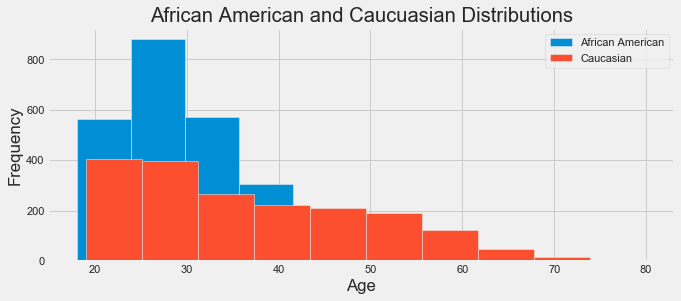

In [132]:
    plt.figure(figsize=(10, 4))
    aa_df["age"].plot(kind="hist", label="African American")
    cc_df["age"].plot(kind="hist", label="Caucasian")
    plt.title("African American and Caucuasian Distributions")
    plt.xlabel("Age")
    plt.legend()
    plt.show()

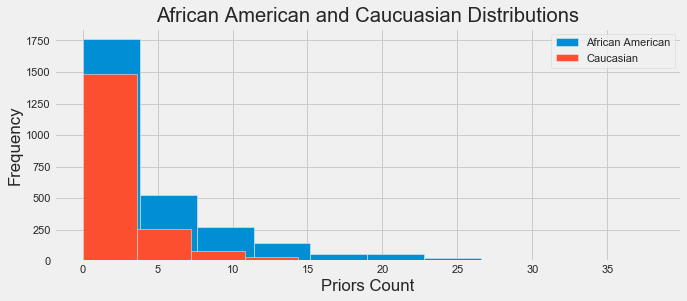

In [137]:
plt.figure(figsize=(10, 4))
aa_df["priors_count"].plot(kind="hist", label="African American")
cc_df["priors_count"].plot(kind="hist", label="Caucasian")
plt.title("African American and Caucuasian Distributions")
plt.xlabel("Priors Count")
plt.legend()
plt.show()

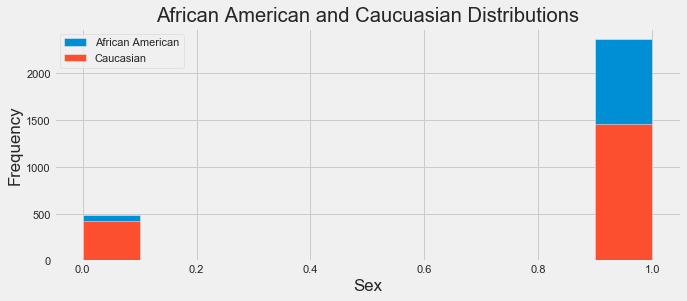

In [135]:
plt.figure(figsize=(10, 4))
aa_df["sex"].plot(kind="hist", label="African American")
cc_df["sex"].plot(kind="hist", label="Caucasian")
plt.title("African American and Caucuasian Distributions")
plt.xlabel("Sex")
plt.legend()
plt.show()

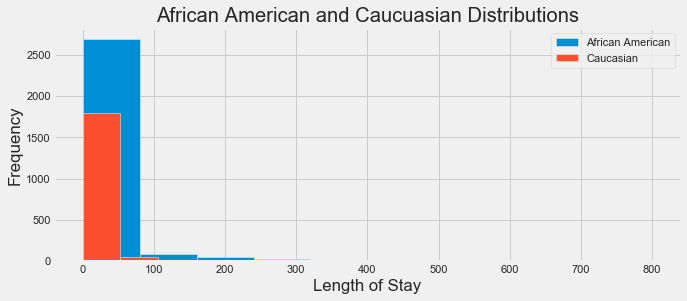

In [168]:
plt.figure(figsize=(10, 4))
aa_df["length_of_stay"].plot(kind="hist", label="African American")
cc_df["length_of_stay"].plot(kind="hist", label="Caucasian")
plt.title("African American and Caucuasian Distributions")
plt.xlabel("Length of Stay")
plt.legend()
plt.show()

### 1.4
<b> 
Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   
**Question 2: Baseline model fitting [19 points]**

**2.1** [15pts] Build a logistic regression model to predict recidivism (`two_year_recid`) on these data and be sure to include race as a predictor.<br />
**NOTE**: In your list of predictors, `race` is one of the predictors.

Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. *False Positive Rate(FPR)* as a percentage for:
    - `African Americans`
    - `Cacausians`
3. *False Negative Rate(FNR)* as a percentage for:
    - `African Americans`
    - `Caucasians`
4. Ratio of the FPR between `African_Americans` and `Caucasians`
5. Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$

<br  /><br />
**2.2** [4pts] What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.


## Solutions

### 2.1
<b> 
Build a logistic regression model to predict recidivism (two_year_recid) on these data and be sure to include race as a predictor.

In [66]:
# this function returns FPR and FNR given true and predicted values
def cal_fpr_fnr(ytest, y_preds):
    TN = confusion_matrix(ytest, y_preds)[0][0]
    FP = confusion_matrix(ytest, y_preds)[0][1]
    FN = confusion_matrix(ytest, y_preds)[1][0]
    TP = confusion_matrix(ytest, y_preds)[1][1]
    FPR = FP / (FP + TN)
    FNR = FN / (FP + TN)
    return FPR, FNR

In [69]:
# instantiate logistic regression model
log_clf = LogisticRegression(random_state=42, max_iter=10000)
# fit on the training set
log_clf.fit(Xtrain, ytrain)
# predict on validation set
y_preds = log_clf.predict(Xtest)

aa_preds = log_clf.predict(X_aa)
cc_preds = log_clf.predict(X_cc)

fpr_aa, fnr_aa = cal_fpr_fnr(y_aa, aa_preds)
fpr_cc, fnr_cc = cal_fpr_fnr(y_cc, cc_preds)

fpr_ratio = fpr_aa/fpr_cc
fnr_ratio = fnr_aa/fnr_cc

# calculate overall accuracy
acc = accuracy_score(ytest, y_preds)

# Display Overall Accuracy, FPR and FNR for two races

print("Overall model accuracy: {:.2f}%".format(acc*100))
print("\nFalse Positive Rate (African American): {:.2f}%".format(fpr_aa * 100))
print("False Positive Rate (Caucasian): {:.2f}%".format(fpr_cc * 100))

print("\nFalse Negative Rate (African American): {:.2f}%".format(fnr_aa * 100))
print("False Negative Rate (Caucasian): {:.2f}%".format(fnr_cc * 100))

print("\nRatio of the FPR between African_Americans and Caucasians: {:.3f}".format(fpr_ratio))
print("Ratio of the FNR between African_Americans and Caucasians: {:.3f}".format(fnr_ratio))

Overall model accuracy: 69.47%

False Positive Rate (African American): 31.37%
False Positive Rate (Caucasian): 16.32%

False Negative Rate (African American): 29.90%
False Negative Rate (Caucasian): 31.59%

Ratio of the FPR between African_Americans and Caucasians: 1.922
Ratio of the FNR between African_Americans and Caucasians: 0.946


### 2.2
<b>
What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 3: 'Race'less model fitting [16 points]**
 
**3.1** [10pts] Refit the logistic model in 2.1 but this time **without** `race` as a predictor. 
Again, Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. **False Positive Rate(FPR)** as a percentage for:
    - African Americans
    - Caucasians
2. **False Negative Rate(FNR)** as a percentage for:
    - African Americans
    - Caucasians
3. 
    - Ratio of the FPR between `African_Americans` and `Caucasians`
    - Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$


<br /><br />

**3.2** [2pts] Now, without the `race` as a predictor, what do you observe? 
<br /><br />
**3.3** [2pts] How do these compare to the model when the race **is** included as a predictor?
<br /><br />
**3.4** [2pts] Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


## Solutions

### 3.1
<b>
Refit the logistic model in 2.1 but this time without race as a predictor. 

In [73]:
# assign predictor and response variable
X_new = df_dummies.drop(["two_year_recid", "race_Caucasian"], axis=1)
y = df_dummies.two_year_recid

# assigining data related to African Americans only
X_aa_new = X_aa.drop("race_Caucasian", axis=1)
y_aa_new = y[X.race_Caucasian == 0]

# assigining data related to Caucasian only
X_cc_new = X_cc.drop("race_Caucasian", axis=1)
y_cc_new = y[X.race_Caucasian == 1]

# split the dataframe
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [74]:
# Refitting the logistic model wihtout race as a predictor
log_clf.fit(Xtrain, ytrain)
# predict on validation set
y_preds = log_clf.predict(Xtest)

aa_preds = log_clf.predict(X_aa_new)
cc_preds = log_clf.predict(X_cc_new)

fpr_aa, fnr_aa = cal_fpr_fnr(y_aa_new, aa_preds)
fpr_cc, fnr_cc = cal_fpr_fnr(y_cc_new, cc_preds)

fpr_ratio = fpr_aa/fpr_cc
fnr_ratio = fnr_aa/fnr_cc

# calculate overall accuracy
acc = accuracy_score(ytest, y_preds)

# Display Overall Accuracy, FPR and FNR for two races

print("Overall model accuracy: {:.2f}%".format(acc*100))
print("\nFalse Positive Rate (African American): {:.2f}%".format(fpr_aa * 100))
print("False Positive Rate (Caucasian): {:.2f}%".format(fpr_cc * 100))

print("\nFalse Negative Rate (African American): {:.2f}%".format(fnr_aa * 100))
print("False Negative Rate (Caucasian): {:.2f}%".format(fnr_cc * 100))

print("\nRatio of the FPR between African_Americans and Caucasians: {:.3f}".format(fpr_ratio))
print("Ratio of the FNR between African_Americans and Caucasians: {:.3f}".format(fnr_ratio))

Overall model accuracy: 67.26%

False Positive Rate (African American): 29.90%
False Positive Rate (Caucasian): 16.23%

False Negative Rate (African American): 30.63%
False Negative Rate (Caucasian): 32.37%

Ratio of the FPR between African_Americans and Caucasians: 1.842
Ratio of the FNR between African_Americans and Caucasians: 0.946


### 3.2
<b>
Now, without the race as a predictor, what do you observe?

**Your answer here**

### 3.3
<b>How do these compare to the model when the race is included as a predictor?

**Your answer here**

### 3.4
<b>Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 4: Receiver Operating Characteristic curve [10 points]**

**4.1** [5pts] Use logistic regression & upsampling methods from above and plot the *Receiver Operating Characteristic curve* for two races, `African Americans` & `Caucasians`. 
<br /><br />
**4.2** [5pts] You will notice that changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **unbiased**. So what shall we do?

- Remove bias?
- Lose model accuracy?

Write down your strategy to overcome this difficulty. Please keep your answers short (300 word limit)


## Solutions

### 4.1
<b>
Use logistic regression & upsampling methods from above and plot the Receiver Operating Characteristic curve for two races, African Americans & Caucasians.

In [0]:
#your code here

### 4.2
<b>
How to ensure the model is accuracte and unbiased? Please keep your answers short (300 word limit)

**Your answer here**

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part C: Come up with a better model [20 points total] 
</h2>  
    
Improve the models you have previously coded by including:
 - Polynomial terms
 - Interaction terms
 - Regularization parameters
 - Different upsampling techniques
 - KNN classification

with a goal to maximize the new metric which includes both the bias and the accuracy, we define `Bias_Corrected_Accuracy(BCA)` as:
    

$$BCA = Acccuracy - {\left|FPR(AA) - FPR(CC)\right|}$$
    
 
Please report your maximum `BCA` on the forums and add the computation code to your homework for bonus points.

**Note:** The ideas given above are not exhaustive. You are free to try other betters to come up with a better model.



In [0]:
#your code here